<a href="https://colab.research.google.com/github/RezuanChowdhuryRifat/SETI-Signal-Classification/blob/main/KNN_Classifier_with_ResNet101_feature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.resnet import ResNet101
import tensorflow as tf




# Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/dataset
!unzip "/content/drive/MyDrive/dataset/primary_small_v1.zip"

/content/drive/MyDrive/dataset
Archive:  /content/drive/MyDrive/dataset/primary_small_v1.zip
   creating: primary_small_v1/test/
   creating: primary_small_v1/test/brightpixel/
  inflating: primary_small_v1/test/brightpixel/1004_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1056_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1112_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1128_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1219_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1293_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1300_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1301_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1399_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1401_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1411_brightpixel.png  
  inflating: primary_small_v1/test/brightpixel/1469_b

**Image Processing**

In [4]:

train_path = "/content/drive/MyDrive/dataset/primary_small_v1/train"
test_path = "/content/drive/MyDrive/dataset/primary_small_v1/test"
valid_path = "/content/drive/MyDrive/dataset/primary_small_v1/valid"


SIZE = 224  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_small_v1/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Capture validation data and labels into respective lists

valid_images = []
valid_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_small_v1/valid/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        valid_images.append(img)
        valid_labels.append(fruit_label)

#Convert lists to arrays                
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Capture test data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_small_v1/test/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(valid_labels)
valid_labels_encoded = le.transform(valid_labels)

x_train, y_train, x_test, y_test, x_valid, y_valid = train_images, train_labels_encoded,test_images, test_labels_encoded, valid_images, valid_labels_encoded

x_train, x_test = x_train / 255.0, x_test / 255.0

brightpixel
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1003_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1018_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1023_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1031_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1035_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1037_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1043_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1054_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1068_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1085_brightpixel.png
/content/drive/MyDrive/dataset/primary_small_v1/train/brightpixel/1086_brightpixel.png
/content/drive/MyDrive/dataset/

**Plot image**

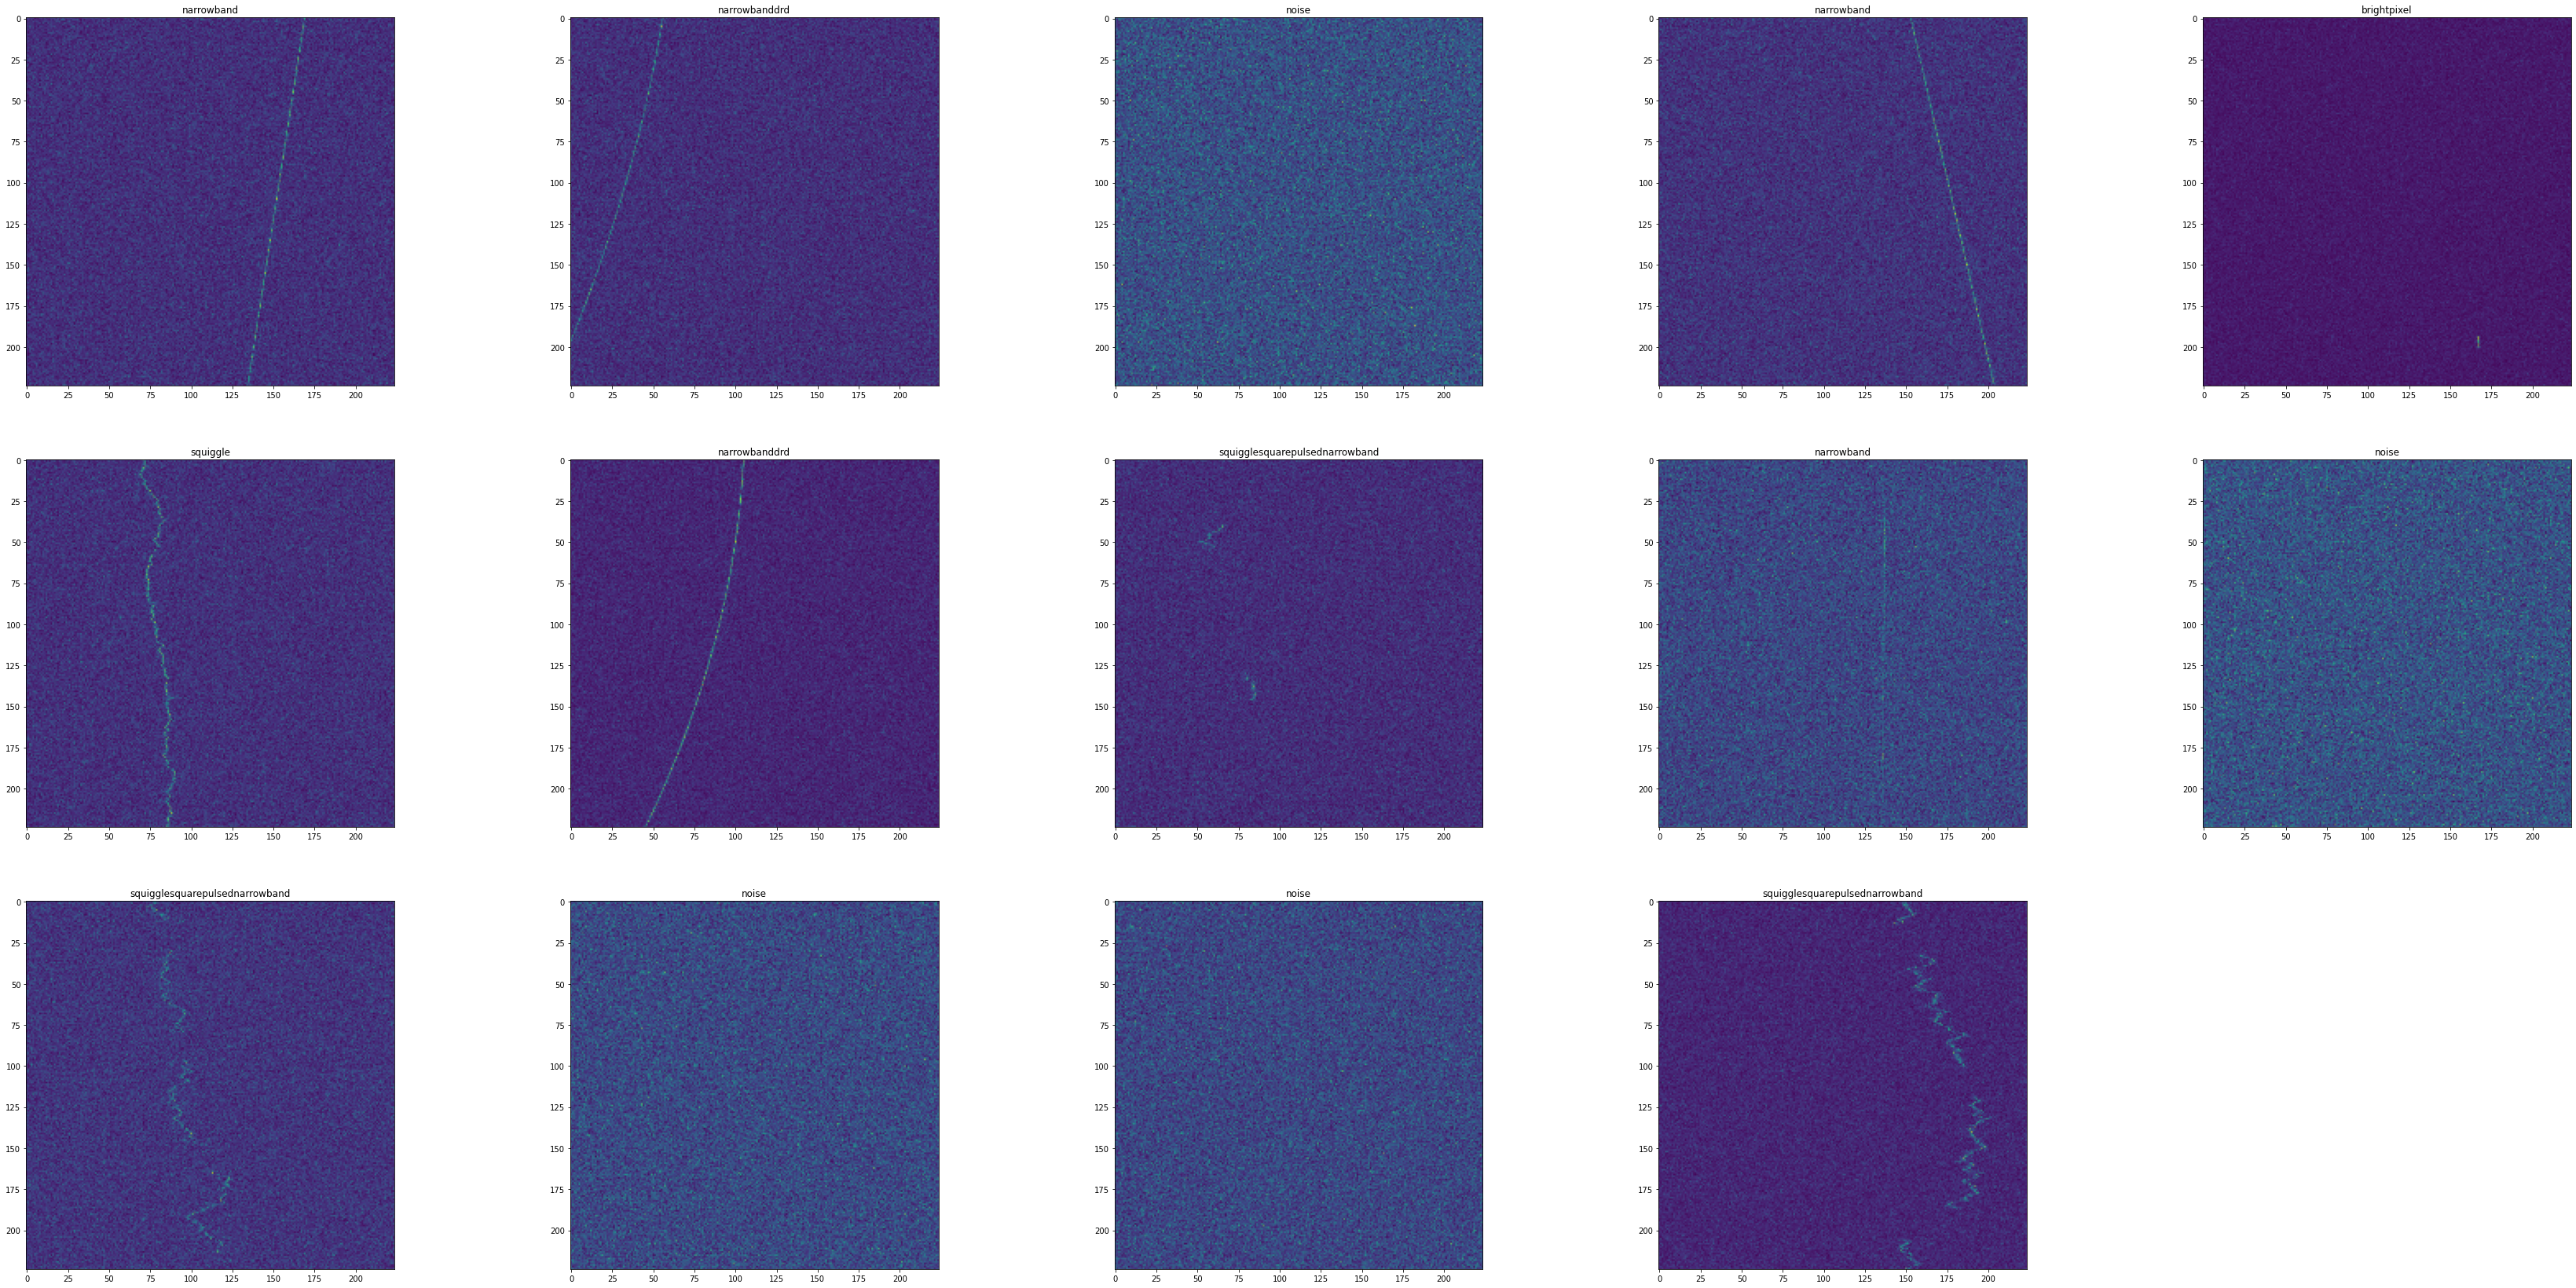

In [5]:
plt.figure(figsize=(60, 50))
for i in range(1, 15):
  plt.subplot(5, 5, i)
  n=np.random.randint(0, x_train.shape[0])
  img = x_train[n]
  plt.imshow(img)
  plt.title(train_labels[n])


# Model

**Feature Extractor**

In [7]:
resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in resnet101.layers:
	layer.trainable = False
    
resnet101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

**Training**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

feature_extractor = resnet101.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features, y_train)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Training Accuracy = ", metrics.accuracy_score(train_labels, prediction_knn))
cm = confusion_matrix(train_labels, prediction_knn)
sns.heatmap(cm, annot=True)




70/70 [==============================] - 22s 138ms/step
Training Accuracy =  0.4348214285714286


In [9]:
X_valid_feature = resnet101.predict(x_valid)
X_valid_features = X_valid_feature.reshape(X_valid_feature.shape[0], -1)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(X_valid_features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Validation Accuracy = ", metrics.accuracy_score(valid_labels, prediction_knn))
cm2 = confusion_matrix(valid_labels, prediction_knn)
sns.heatmap(cm2, annot=True)

9/9 [==============================] - 4s 232ms/step
Validation Accuracy =  0.1357142857142857


**Testing**

14/14 [==============================] - 4s 178ms/step
Testing Accuracy =  0.30714285714285716


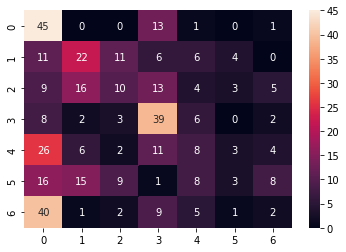

In [10]:
X_test_feature = resnet101.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Testing Accuracy = ", metrics.accuracy_score(test_labels, prediction_knn))
cm3 = confusion_matrix(test_labels, prediction_knn)
sns.heatmap(cm3, annot=True)

1/1 [==============================] - 0s 430ms/step
The prediction for this image is:  ['squarepulsednarrowband']
The actual label for this image is:  squarepulsednarrowband


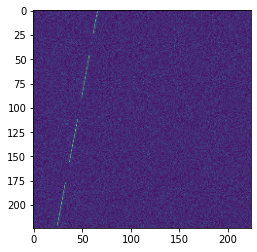

In [11]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=resnet101.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_knn = knn.predict(input_img_features)[0] 
prediction_knn = le.inverse_transform([prediction_knn])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_knn)
print("The actual label for this image is: ", test_labels[n])